In [1]:
import numpy as np
import os

def freq2mel(freq):
    return 2596.0 * np.log10(1 + freq / 700.0)

def eval2freq(evals):
    return np.sqrt(evals) * 0.5 / np.pi

def eval2mel(evals):
    return freq2mel(eval2freq(evals))

# from sklearn.metrics import mean_squared_error
# error_0 = mean_squared_error(target, pred)
# error_res = mean_squared_error(target, res_pred)

In [2]:
import numpy as np
import os

TEST_DATA_DIR = '../DATA/test_results'
TARGET_DIR = '../DATA/eigen'
MN_DIR = '../DATA/test_results'
RES_DIR = '../DATA/resnet_test_results'

filename_list = []

target_list = []
mn_pred_list = []
res_pred_list = []

for root, dirs, files in os.walk(TEST_DATA_DIR, topdown=False):
    for name in files:
        filename_list.append(os.path.splitext(os.path.basename(name))[0])

for filename in  filename_list:
    target = np.load(os.path.join(TARGET_DIR, filename, 'eigen.npz'))['evals']
    mn_pred = np.load(os.path.join(MN_DIR, filename+'.npy')) * 1e9
    res_pred = np.load(os.path.join(RES_DIR, filename+'.npy')) * 1e9

    target_list.append(target)
    mn_pred_list.append(mn_pred)
    res_pred_list.append(res_pred)

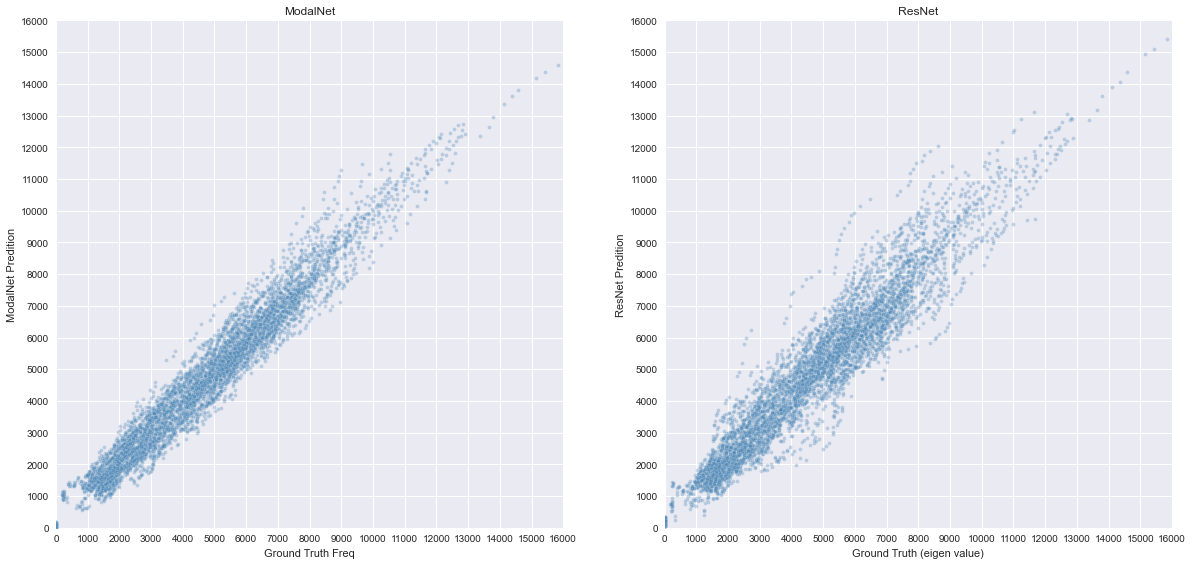

In [21]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
plt.style.use('seaborn')
# print(plt.style.available) # 打印样式列表

##### CONFIG ######
DOT_SIZE = 60
COLOR = 'steelblue'
MARKER = '.'
ALPHA = 0.3
LINE_WIDTH = 0.3
EDGE_COLOR = 'white'

MAX_VALUE = 16000
LOCATOR = 1000
x_major_locator=MultipleLocator(LOCATOR)
y_major_locator=MultipleLocator(LOCATOR)

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.scatter(x0,
            y1,
            s = DOT_SIZE,
            c = COLOR,
            marker = MARKER,
            alpha = ALPHA,
            linewidths = LINE_WIDTH,
            edgecolors = EDGE_COLOR
            )

plt.xlabel('Ground Truth Freq')
plt.ylabel('ModalNet Predition')
plt.title('ModalNet')

ax=plt.gca()
ax.set_aspect(1)
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlim(0, MAX_VALUE)
plt.ylim(0, MAX_VALUE)

plt.subplot(1,2,2)
plt.scatter(x0,
            y2,
            s = DOT_SIZE,
            c = COLOR,
            marker = MARKER,
            alpha = ALPHA,
            linewidths = LINE_WIDTH,
            edgecolors = EDGE_COLOR
            )
plt.xlabel('Ground Truth (eigen value)')
plt.ylabel('ResNet Predition')
plt.title('ResNet')

ax=plt.gca()
ax.set_aspect(1)
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlim(0, MAX_VALUE)
plt.ylim(0, MAX_VALUE)

plt.show()